In [1]:
import glob
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Set all fontsizes to 6
plt.rcParams.update({'font.size': 6})

In [8]:
def read_results(file, metrics = ['SAD', 'MSE'], results_order = ['PCA', 'N-FINDR + FCLS', 'VCA + FCLS', 'Dense AE', 'Convolutional AE', 'Transformer AE', 'Convolutional Transformer AE']):
    results = pd.read_csv(file)

    columns_to_keep = sum([[f'{metric}_mean', f'{metric}_std'] for metric in metrics], [])
    results = results.set_index('index').reindex(results_order)[columns_to_keep]
    return results

In [9]:
def plot_results_combined(results, with_pca=True, metrics = ['SAD', 'MSE'], figsize=(1.88, 0.8), endmember_ylim=(0, 1), abundance_ylim=(0, 0.13)):

    # Define the number of baselines
    num_baselines = 3 if with_pca else 2

    # Define colors for models and baselines
    # colors = plt.cm.get_cmap('viridis', 5)
    # color_models = colors(1)
    # color_baselines = colors(2)

    color_models = 'cornflowerblue'
    color_baselines = 'lightsalmon'

    fig, axes = plt.subplots(1, len(metrics), figsize=figsize)

    if not with_pca:
        results = results.drop('PCA')

    methods = list(results.index)
    methods[-1] = 'Conv. Trans. AE'

    for j, metric in enumerate(metrics):
        means = [ results[f'{metric}_mean'][model] for model in results.index ]
        errors = [ results[f'{metric}_std'][model] for model in results.index ]

        baseline_indices = np.arange(num_baselines)
        model_indices = np.arange(num_baselines, len(results.index))

        means_models = [ means[i] for i in model_indices ]
        errors_models = [ errors[i] for i in model_indices ]

        means_baselines = [ means[i] for i in baseline_indices ]
        errors_baselines = [ errors[i] for i in baseline_indices ]


        # Plot the bars for baselines with a different pattern
        axes[j].bar(baseline_indices, means_baselines, align='center',  color=color_baselines, zorder=1)
        axes[j].errorbar(baseline_indices, means_baselines, yerr=errors_baselines, zorder=0, color='black', capsize=2, fmt='none')

        # Plot the bars for models
        axes[j].bar(model_indices, means_models, align='center', color=color_models, zorder=1)
        axes[j].errorbar(model_indices, means_models, yerr=errors_models, zorder=0, color='black', capsize=2, fmt='none')

        # Add some text for labels, title and axes ticks
        axes[j].set_xticks(np.arange(len(results.index)))
        # axes[j].set_xticklabels(methods, rotation=90)
        # axes[j].set_ylabel(metric)

        y_lim = endmember_ylim if metric == 'SAD' else abundance_ylim
        axes[j].set_ylim(y_lim)

        y_ticks = [0, endmember_ylim[1]] if metric == 'SAD' else [0, abundance_ylim[1]]
        axes[j].set_yticks(y_ticks)
        axes[j].set_yticklabels([])

        # axes[j].yaxis.grid(True)
        axes[j].set_xlim(-1, len(results.index))

        # title = 'Endmember' if metric == 'SAD' else 'Abundance'
        # axes[j].set_title(f'{title}\nerror', fontsize=9)

        if j > 0:
            # move y-axis to the right
            axes[j].yaxis.tick_right()
            axes[j].yaxis.set_label_position("right")

        if j == 0:
            # remove right y-axis
            axes[j].spines['right'].set_visible(False)
        if j == 1:
            # make left y-axis dashed
            axes[j].spines['left'].set_linestyle((0, (5, 5)))

    # remove space between plots
    fig.subplots_adjust(wspace=0)

    # Show the plot
    return fig

# Plot results on synthetic data

In [10]:
synth_results_folder = 'results'
save_to = 'barplots'
scenes = ['chessboard', 'gaussian', 'dirichlet']

os.makedirs(save_to, exist_ok=True)

gaussian


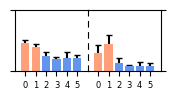

dirichlet


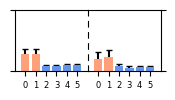

In [30]:
scenario_name = 'bilinear_linear_models'
scenario_with_bilinear_name = 'bilinear_bilinear_models'
os.makedirs(os.path.join(save_to, scenario_name), exist_ok=True)

order = ['PCA', 'N-FINDR + FCLS', 'VCA + FCLS', 'Dense AE', 'Convolutional AE', 'Transformer AE', 'Convolutional Transformer AE']

for scene in scenes:
    if scene == 'chessboard':
        continue

    scene_folder = os.path.join(synth_results_folder, scenario_name, scene)

    scene_bilinear_folder = os.path.join(synth_results_folder, scenario_with_bilinear_name, scene)

    scene_type = scene_folder.split("/")[-1]
    results = read_results(f'{scene_folder}/metrics_total.csv')

    results_bilinear = read_results(f'{scene_bilinear_folder}/metrics_total.csv')

    results_bilinear.update(results[:3])

    results = results_bilinear.loc[order]

    print(scene_type)
    fig = plot_results_combined(results, with_pca=False)

    fig.savefig(f'{save_to}/{scenario_name}/{scene_type}.png', dpi=1200)

    plt.show()